<a href="https://colab.research.google.com/github/TheeraphatKhiangphukhiao/nlp-question-classifier/blob/main/Question_Classification_Binary_Weighting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#read dataset to dataframe
df = pd.read_csv("/content/drive/MyDrive/1204315 - Natural Language Processing/dataset/question_classification_dataset.csv")
df.head()


,Unnamed: 0,Questions,Category0,Category1,Category2
0,0,How did serfdom develop in and then leave Russ...,DESCRIPTION,DESC,manner
1,1,What films featured the character Popeye Doyle ?,ENTITY,ENTY,cremat
2,2,How can I find a list of celebrities ' real na...,DESCRIPTION,DESC,manner
3,3,What fowl grabs the spotlight after the Chines...,ENTITY,ENTY,animal
4,4,What is the full form of .com ?,ABBREVIATION,ABBR,exp


In [ ]:
# Droping the other Columns because we deel with only Category0
df.drop(['Unnamed: 0', 'Category1', 'Category2'], axis=1, inplace=True)
df.head()

,Questions,Category0
0,How did serfdom develop in and then leave Russ...,DESCRIPTION
1,What films featured the character Popeye Doyle ?,ENTITY
2,How can I find a list of celebrities ' real na...,DESCRIPTION
3,What fowl grabs the spotlight after the Chines...,ENTITY
4,What is the full form of .com ?,ABBREVIATION


In [ ]:
# Counting the target values of Category0
df['Category0'].value_counts()

ENTITY          1250
HUMAN           1223
DESCRIPTION     1162
NUMERIC          896
LOCATION         835
ABBREVIATION      86
Name: Category0, dtype: int64

In [ ]:
df.Category0.replace({'ENTITY': 0, 'HUMAN': 1, 'DESCRIPTION': 2, 'NUMERIC': 3, 'LOCATION': 4, 'ABBREVIATION': 5}, inplace=True)

In [ ]:
df.head()

,Questions,Category0
0,How did serfdom develop in and then leave Russ...,2
1,What films featured the character Popeye Doyle ?,0
2,How can I find a list of celebrities ' real na...,2
3,What fowl grabs the spotlight after the Chines...,0
4,What is the full form of .com ?,5


In [ ]:
#import the necessary libraries
import nltk
import string
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#noise removal function
#function for removing punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

#function for removing number
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl="", string=text)
    return without_number

#function for Convert text to lowercase
def text_lowercase(text):
    return text.lower()


In [ ]:
#Cleaning text
df['Questions'] = df['Questions'].apply(lambda x: remove_punctuation(x)) #removing punctuation
df['Questions'] = df['Questions'].apply(lambda x: remove_numbers(x)) #removing number
df['Questions'] = df['Questions'].apply(lambda x: text_lowercase(x)) #Convert text to lowercase
df.head()

,Questions,Category0
0,how did serfdom develop in and then leave russia,2
1,what films featured the character popeye doyle,0
2,how can i find a list of celebrities real names,2
3,what fowl grabs the spotlight after the chines...,0
4,what is the full form of com,5


In [ ]:
#binary weighting
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(df['Questions'])
X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
X.head()

,aaa,aampw,aaron,abacus,abandoned,abbey,abbie,abbreviate,abbreviated,abbreviation,...,zipper,zitoni,zodiac,zodiacal,zolotow,zones,zoo,zoological,zoonose,zorro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = np.array(X)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
#get class to Y
Y = df['Category0'].to_numpy()
#count number of each class
num_class = df['Category0'].value_counts()
print(num_class)

0    1250
1    1223
2    1162
3     896
4     835
5      86
Name: Category0, dtype: int64


In [ ]:
#split data to train = 70% test=30%
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

X_train.shape,X_test.shape

((3816, 8288), (1636, 8288))

In [ ]:
#create model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=11)

In [ ]:
#evaluation
from sklearn.metrics import classification_report

test_predictions = model.predict(X_test)
#print(test_predictions)
report = classification_report(Y_test, test_predictions,digits=4)
print(report)


              precision    recall  f1-score   support

           0     0.5784    0.3269    0.4177       361
           1     0.8937    0.5139    0.6526       360
           2     0.3923    0.8883    0.5442       367
           3     0.8860    0.6429    0.7451       266
           4     0.7322    0.5339    0.6175       251
           5     0.8333    0.4839    0.6122        31

    accuracy                         0.5801      1636
   macro avg     0.7193    0.5649    0.5982      1636
weighted avg     0.6845    0.5801    0.5853      1636



[Text(0, 0.5, 'ENTITY'),
 Text(0, 1.5, 'HUMAN'),
 Text(0, 2.5, 'DESCRIPTION'),
 Text(0, 3.5, 'NUMERIC'),
 Text(0, 4.5, 'LOCATION'),
 Text(0, 5.5, 'ABBREVIATION')]

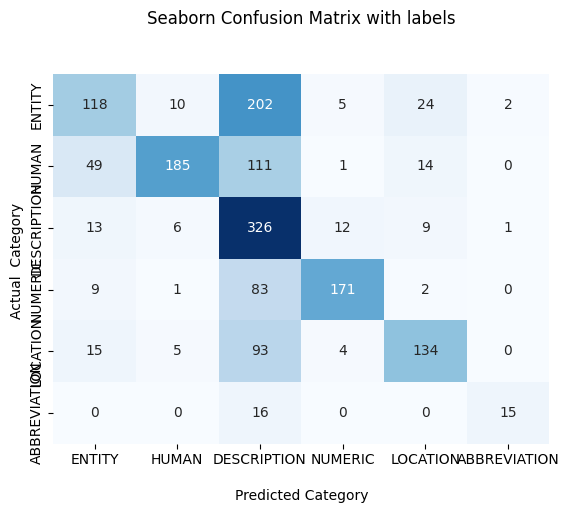

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

conf = confusion_matrix(Y_test, test_predictions)
conf

ax=sn.heatmap(conf,annot=True, fmt="d", cbar=False,cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual  Category ');

## Tick labels
ax.xaxis.set_ticklabels(['ENTITY', 'HUMAN', 'DESCRIPTION', 'NUMERIC', 'LOCATION', 'ABBREVIATION'])
ax.yaxis.set_ticklabels(['ENTITY', 'HUMAN', 'DESCRIPTION', 'NUMERIC', 'LOCATION', 'ABBREVIATION'])